# Analyzes of Hacked Netherlands Websites (2019)

In this study, we want to analyze the hacked (attacked by various methods) Netherlands Websites (extension of __.nl__) in 2019. For the study, we get the data from zone-h.org, which is an open-source database formed by attackers themselves. Because of the captcha warn, we use the cookies of our own browser which we used to access before.

__We get the "first 7 months of 2019" data.__

In [1]:
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import requests
import datetime
import calendar

df=pd.DataFrame()
start_date = pd.to_datetime('2019/01/01')
print('Scrape is starting...')
cookie = {'PHPSESSID': 'XXX','ZHE':'XXX'}
page_no=1
finish_date=pd.to_datetime('today')
date_07=pd.to_datetime('2019/07/31')

while finish_date>start_date:
#while page_no<3:
    url='http://www.zone-h.org/archive/filter=1/published=0/domain=.nl/fulltext=1/page={}'.format(page_no)
    print(url)
    response = requests.post(url, cookies=cookie)
    data = response.text
    soup = BeautifulSoup(data,'lxml')

    for tr in soup.select('tr')[:-2]:
        row = []
        for td in tr.select('td'):
            if td.text.strip():
                row.append(td.text.strip())
            else:
                img = td.select_one('img[title]')
                if img:
                    row.append(img['title'])
                else:
                    row.append('')
            a = ["0" if x == '' else x for x in row] #cleaning the NaN values as 0
        df = df.append([a])
    print('Page {} is complete'.format(page_no))
    page_no+=1
    df[0] = pd.to_datetime(df[0], errors='coerce', format='%Y/%m/%d') #Arrange the Time column
    finish_date=df.nsmallest(1,columns = 0)[0][0] #find the smallest date for continuing to loopp
else:
#Set first row as header
    df.columns = df.iloc[0]
    df = df[1:]
    df.rename(columns={ df.columns[0]: "Time",df.columns[5]: "S_Location",df.columns[6]: "Special" }, inplace = True)
    df["S_Location"] = df["S_Location"].replace("0", "Unknown")#Set the location value of 0 to Unknown
    df["R"] = df["R"].replace("R", "1")#Set the ReAttack value of R to 1
    print('Scrape the data of 2009 is finish')
    df = df[df.Time >= start_date] #eliminate the data before '2019/01/01'
    df = df[date_07>= df.Time] #eliminate the data before '2019/07/31'
    df=df.reset_index(drop=True)
df.to_csv('Zone_H_{}.csv'.format(datetime.datetime.now().strftime('%d.%m.%Y_%H.%M')))#Save as csv file
print('The data is ready!')

Scrape is starting...
http://www.zone-h.org/archive/filter=1/published=0/domain=.nl/fulltext=1/page=1
Page 1 is complete
http://www.zone-h.org/archive/filter=1/published=0/domain=.nl/fulltext=1/page=2
Page 2 is complete
http://www.zone-h.org/archive/filter=1/published=0/domain=.nl/fulltext=1/page=3
Page 3 is complete
http://www.zone-h.org/archive/filter=1/published=0/domain=.nl/fulltext=1/page=4
Page 4 is complete
Scrape the data of 2009 is finish
The data is ready!


#### The Dataframe Legend:
**H** : Homepage defacement

**M** : Mass defacement

**R** : Redefacement

**S_Location** : IP address location of web site server

**Special** : Defacements of important websites

In [2]:
print('The total hacked (.nl) web sites in 2019 is: {}'.format(df.shape[0]))
df.head()

The total hacked (.nl) web sites in 2019 is: 88


,Time,Notifier,H,M,R,S_Location,Special,Domain,OS,View
0,2019-07-31,Mister Spy,0,0,0,Ireland,0,www.marckollaart.nl//def.php,Linux,mirror
1,2019-07-31,Mister Spy,0,0,0,Netherlands,0,www.lotboes.nl//def.php,Linux,mirror
2,2019-07-31,Mister Spy,0,0,0,Netherlands,0,www.betamacx.nl//def.php,Linux,mirror
3,2019-07-31,Mister Spy,0,0,0,Netherlands,0,nooitmeerwatvangehoord.nl//def...,Linux,mirror
4,2019-07-31,Mister Spy,0,0,0,Netherlands,0,maxboes.nl//def.php,Linux,mirror


## Analyze of Data

#### 1) Analyze the Attackers
While analyze the 88 hacked web sites, we understood that __the (.nl) websites are attacked by 49 different attackers__, in 2019.

In [3]:
df_attacker=df.groupby(['Notifier']).Time.agg('count').to_frame('N_Count').sort_values(by = 'N_Count',ascending=False).reset_index()
print('{} (.nl) web sites in hacked 2019 by {} different attackers'.format(format(df.shape[0]),df_attacker.shape[0]))
df_attacker.head()

88 (.nl) web sites in hacked 2019 by 49 different attackers


,Notifier,N_Count
0,Mr.Hydra,12
1,SynnX,7
2,PhantomGhost,5
3,Mister Spy,5
4,GestapoEfsane,4


#### 2) Analyze the Attacks By Monthly
While analyze the 88 hacked web sites, we understood that __the (.nl) websites are attacked every month__, nearly the same average in 2019.

In [4]:
df_daily=df.groupby(['Time']).Time.agg('count').to_frame('Count').reset_index() #group by day and create a new dataframe (df_daily)
df_monthly=df_daily.groupby(df_daily['Time'].dt.strftime('(%m) %B'))['Count'].sum().reset_index() #group by month and create a new dataframe (df_monthly)
df_monthly

,Time,Count
0,(01) January,7
1,(02) February,9
2,(03) March,5
3,(04) April,15
4,(05) May,16
5,(06) June,15
6,(07) July,21


As we see in plot bar; the (.nl) websites are attacked every month and increasing monthly

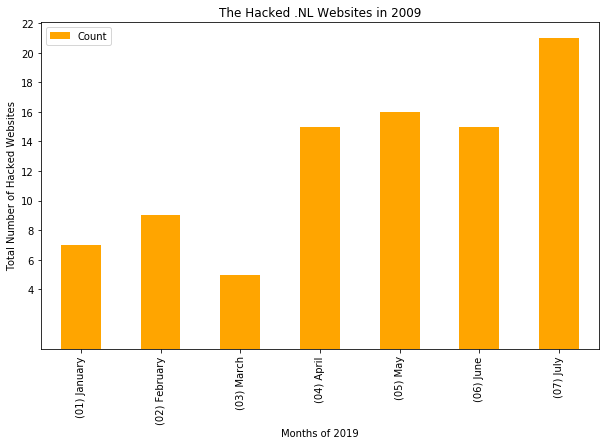

In [5]:
df_monthly.plot.bar(x="Time", y=['Count'],stacked=True,color='orange',figsize=(10,6))
plt.xlabel('Months of 2019') # x-label to the plot
plt.ylabel('Total Number of Hacked Websites') # y-label to the plot
plt.title('The Hacked .NL Websites in 2009') # title to the plot
plt.yticks(list(range(4, 24,2))) #set the y tick
plt.show()

#### 3) Analyze the ReAttack Info
While analyze the 88 hacked web sites, we understood that __23 (.nl) websites are also attacked before__, in 2019.

In [6]:
df_reattack=df.groupby(['R']).Time.agg('count').to_frame('RA_Count').sort_values(by = 'RA_Count',ascending=False).reset_index()
df_reattack.rename(columns={ df_reattack.columns[0]: "ReAttack"}, inplace = True)
df_reattack.head()

,ReAttack,RA_Count
0,0,65
1,1,23


As we see in pie chart; __26% of the total websites are also attacked before__ in 2019

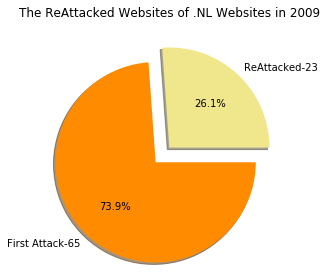

In [7]:
#set the explode and colors
explode = (0.2,0)
colors = ['darkorange','khaki']
plt.title('The ReAttacked Websites of .NL Websites in 2009') # title to the pie chart
#show the pie chart
plt.pie(df_reattack['RA_Count'], explode=explode,colors=colors,labels=('First Attack-{}'.format(df_reattack['RA_Count'][0]),'ReAttacked-{}'.format(df_reattack['RA_Count'][1])), autopct='%1.1f%%',counterclock=False, shadow=True)
plt.tight_layout()
plt.show()

#### 4) Analyze the Server Locations:
While analyze the 88 hacked web sites, we understood that the web sites exits in 8 different location (country)

In [8]:
df_location=df.groupby(['S_Location']).Time.agg('count').to_frame('L_Count').sort_values(by = 'L_Count',ascending=False).reset_index()
df_location

,S_Location,L_Count
0,Netherlands,75
1,Germany,3
2,United States,3
3,Ireland,2
4,United Kingdom,2
5,Belgium,1
6,Greece,1
7,Unknown,1


As we see in pie chart; nearly __15% of the websites__ are located outside of Netherlands

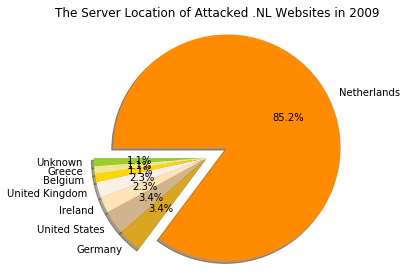

In [10]:
#set the explode and colors
explode = (0.2,0,0,0,0,0,0,0)
colors = ['darkorange','goldenrod','tan','moccasin','linen','gold','khaki','yellowgreen']
plt.title('The Server Location of Attacked .NL Websites in 2009') # title to the pie chart
#show the pie chart
plt.pie(df_location['L_Count'], explode=explode,colors=colors,labels=df_location['S_Location'], autopct='%1.1f%%',counterclock=False, shadow=True,startangle=180)
plt.tight_layout()
plt.axis('scaled')
plt.show()

## Result and Evaluation

We understood in this study;
- 88 (.nl) websites are attacked (hacked) in the first 7 months of 2019.
- Websites are attacked by 49 different attackers
- Websites are attacked every month and increasing monthly
- __23 websites (26% of total) are also attacked before__
- Websites exits 8 different country and nearly 15% them are located outside of Netherlands